# K -MEANS CLUSTERING

In [171]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs #its used to create random clusters

# random_generated_dataset">k-Means on a randomly generated dataset

In [16]:
np.random.seed(0)

In [23]:
X,y=make_blobs( n_samples=5000,
    centers= [[4, 4], [-2, -1], [2, -3],[1,1]] ,
    cluster_std=0.9,
)

In [27]:
X.shape

(5000, 2)

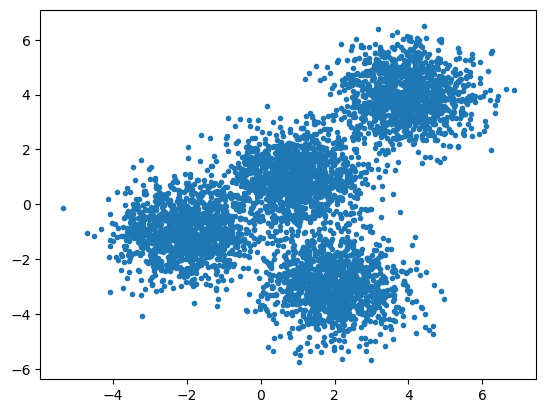

In [31]:
plt.scatter(X[:,0],X[:,1],marker='.')

MODEL BUILDING

In [34]:
model=KMeans(init='k-means++',n_clusters=4,n_init=12) #k-means takes the initial clusters

In [40]:
model.fit(X) #Now let's fit the KMeans model with the feature matrix we created above, X(no y is there for unsupervised learning)

KMeans(n_clusters=4, n_init=12)

In [60]:
labels=model.labels_
labels

array([2, 0, 0, ..., 3, 2, 2])

In [64]:
clusters=model.cluster_centers_
clusters

array([[ 1.99741008, -3.01666822],
       [ 0.96900523,  0.98370298],
       [-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687]])

  # creating a visual plot

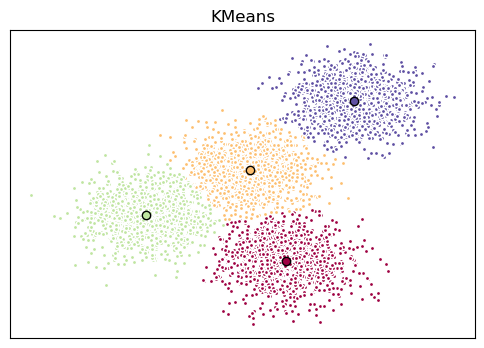

In [136]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = clusters[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [76]:
len(set(labels))

4

In [80]:
np.linspace(0, 1, len(set(labels)))

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [102]:
plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [100]:
for i ,j in zip (range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    print(i)
    print(j)

0
[0.61960784 0.00392157 0.25882353 1.        ]
1
[0.99346405 0.74771242 0.43529412 1.        ]
2
[0.74771242 0.89803922 0.62745098 1.        ]
3
[0.36862745 0.30980392 0.63529412 1.        ]


In [104]:
len([[4,4], [-2, -1], [2, -3], [1, 1]])

4

# practice

In [107]:
model=KMeans(n_clusters=3,
    init='k-means++',
    n_init=12)

In [109]:
model.fit(X)

KMeans(n_clusters=3, n_init=12)

In [133]:
lab=model.labels_
set(lab)

{0, 1, 2}

In [129]:
cen=model.cluster_centers_
cen

array([[ 3.70310165,  3.69627302],
       [-0.80700142, -0.17035769],
       [ 2.02030226, -2.94614399]])

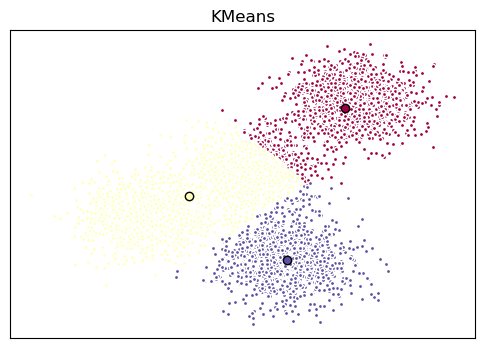

In [127]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(lab))))
ax = fig.add_subplot(1, 1,1)
for k, col in zip(range(len(cen)), colors):
    my_members = (lab == k)
    cluster_center = cen[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()


# CUSTOMER SEGMENTATION WITH K-MEANS

DATASET LOADING

In [616]:
df=pd.read_csv("C:\\Users\\sivas\\OneDrive\\Desktop\\Coursera\IBM\Machine learning\Cust_Segmentation.csv")

In [618]:
df.head(3)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9


In [620]:
df.shape

(850, 10)

In [622]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

# pre-processing

In [625]:
df.drop(columns='Address',axis=1,inplace=True)

In [627]:
df.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8


# Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [630]:
stand=StandardScaler()
X=df.iloc[:,1:]
X # df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [632]:
x=df.values[:,1:]
x #array

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [634]:
x=np.nan_to_num(x)

In [636]:
trans=stand.fit_transform(x)
trans

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [638]:
trans.shape

(850, 8)

# K-Means modelling

In [640]:
clusnum=3
model=KMeans( n_clusters=clusnum,
    init='k-means++',
    n_init=12,)

In [642]:
model.fit(x)

C:\Users\sivas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, n_init=12)

In [643]:
cus_label=model.labels_
print(set(cus_label))
cus_label[0:5]

{0, 1, 2}


array([0, 1, 0, 0, 2])

In [644]:
cus_center=model.cluster_centers_
cus_center

array([[3.29645609e+01, 1.61479199e+00, 6.37442219e+00, 3.11648690e+01,
        1.03254083e+00, 2.10413251e+00, 2.37288136e-01, 1.00947612e+01],
       [4.13333333e+01, 1.95628415e+00, 1.52568306e+01, 8.39289617e+01,
        3.10363934e+00, 5.76527869e+00, 1.36612022e-01, 1.07245902e+01],
       [4.53888889e+01, 2.66666667e+00, 1.95555556e+01, 2.27166667e+02,
        5.67844444e+00, 1.09071667e+01, 2.22222222e-01, 7.32222222e+00]])

In [645]:
df['Labels']=cus_label

In [646]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8,0
846,847,28,2,7,34,0.359,2.021,0.0,7.0,0
847,848,25,4,0,18,2.802,3.210,1.0,33.4,0
848,849,32,1,12,28,0.116,0.696,0.0,2.9,0


In [652]:
df.groupby('Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


# Visualization

Text(0, 0.5, 'INCOME')

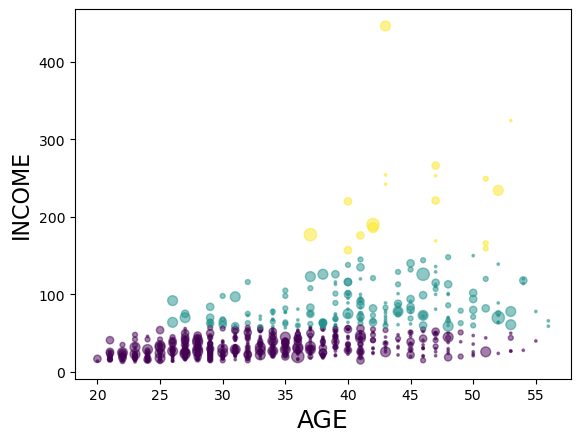

In [655]:
area=np.pi* ( x[:, 1])**2  
plt.scatter(x[:,0],x[:,3],s=area,c=df.Labels,alpha=0.5) # alpha 0 output is transparent 1 color showed opaque #s is marker size
plt.xlabel('AGE',fontsize=18)
plt.ylabel('INCOME',fontsize=16)

In [657]:
np.pi* ( x[:, 1])**2  

array([12.56637061,  3.14159265, 12.56637061, 12.56637061,  3.14159265,
        3.14159265, 12.56637061, 28.27433388,  3.14159265, 28.27433388,
       28.27433388, 12.56637061,  3.14159265,  3.14159265, 28.27433388,
        3.14159265,  3.14159265, 50.26548246,  3.14159265,  3.14159265,
       12.56637061, 28.27433388, 28.27433388,  3.14159265, 50.26548246,
        3.14159265,  3.14159265,  3.14159265, 12.56637061, 12.56637061,
       28.27433388, 12.56637061, 12.56637061, 28.27433388,  3.14159265,
       12.56637061, 28.27433388,  3.14159265,  3.14159265, 28.27433388,
        3.14159265, 28.27433388, 12.56637061, 78.53981634,  3.14159265,
       28.27433388,  3.14159265,  3.14159265,  3.14159265, 12.56637061,
        3.14159265,  3.14159265,  3.14159265,  3.14159265, 28.27433388,
        3.14159265,  3.14159265, 28.27433388,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265, 12.56637061, 12.56637061,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14

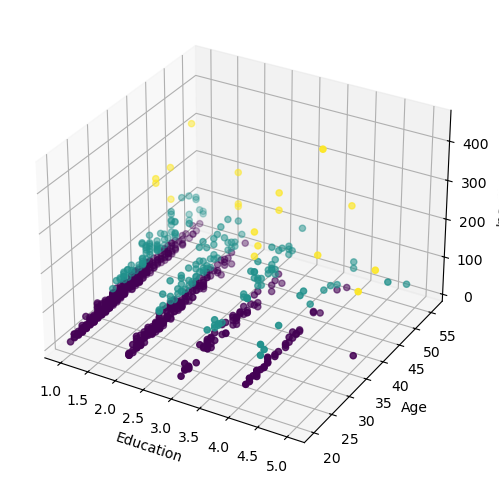

In [666]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax = fig.add_subplot(111, projection='3d')



plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter3D(x[:, 1], x[:, 0], x[:, 3], c= df.Labels.astype('float'))
